# 1. 강의영상 

In [1]:
#{{<video https://youtu.be/playlist?list=PLQqh36zP38-wMY2MS-ZGKFXqVgbTeAzNQ&si=iojT6Aif9fwoOyUN >}}

# 2. Imports 

In [565]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import collections

# 3. 오브젝트

> "파이썬의 모든 것은 오브젝트이다. 값도, 함수도, 인스턴스도, 클래스도 오브젝트이다." <-- 살짝 과장이지만 일단 명언처럼 외우세여

## A. 오브젝트 

> 오브젝트 특징: `id(오브젝트)` 가 동작함 

`-` 예시1: 정수

In [2]:
a = 1 
id(a)

139761737007344

`-` 예시2: 함수 

In [3]:
f = lambda x: x
id(f)

139760240696704

`-` 예시3: 클래스와 인스턴스 

In [499]:
class RPS:
    pass 

In [500]:
a = RPS()
id(a)

140160021638800

In [501]:
id(RPS)

37984320

`-` 예시4: 파이썬 제공 기본클래스

In [6]:
id(list)

7629888

In [503]:
id(str)

7593344

In [504]:
id(dict)

7626144

`-` 예시5: 파이썬 기본 제공기능 

In [7]:
id(range)

7611936

In [8]:
id(len)

139761737634320

In [9]:
id(id)

139761737633840

`-` 모듈 

In [10]:
id(np)

139761681979152

In [11]:
id(pd)

139760922412512

## B. 오브젝트가 아님 

`-` 예시1: 구문

In [12]:
id(lambda)

SyntaxError: invalid syntax (3978401784.py, line 1)

In [13]:
id(def)

SyntaxError: invalid syntax (839197359.py, line 1)

`-` 예시2: 제어구조

In [14]:
id(for)

SyntaxError: invalid syntax (1172573452.py, line 1)

In [15]:
id(if)

SyntaxError: invalid syntax (2846441332.py, line 1)

In [16]:
id(while)

SyntaxError: invalid syntax (2390637289.py, line 1)

# 4. `__call__` $(\star\star\star)$

## A. 함수도 인스턴스다

`-` 다시 함수를 공부해봅시다.

In [17]:
def f(x):
    return x+1

In [18]:
f(3)

4

`-` 함수의 사용방법?

- 입력으로 변수 x를 받음 = 입력으로 인스턴스 x를 받음.
- 출력으로 변수 x+1을 리턴 = 출력으로 인스턴스 x+1을 리턴.

`-` 사실1: 파이썬에서 함수는 인스턴스를 입력으로 받고 인스턴스를 출력한다.

`-` 함수의 자료형?

In [19]:
?f

Signature: f(x)
Docstring: <no docstring>
File:      /tmp/ipykernel_846510/1304018138.py
Type:      function

- type이 function이다.
- f는 function class의 instance이다.
- 결국 f 역시 하나의 오브젝트에 불과하다.

`-` 사실2: 함수도 결국 인스턴스이다. -> 함수의 입력으로 함수를 쓸 수도 있고 함수의 출력으로 함수가 나올 수도 있다.

## B. 함수사용 고급

(예제1) 숫자입력, 함수출력

In [505]:
def f(a):
    def g(x):
        return (x-a)**2
    return g

In [506]:
g=f(10) # g(x)=(x-10)**2

In [507]:
g(2) # (2-10)**2 = 64

64

- 해석: $f(a)$는 $a$를 입력으로 받고 $g(x)=(x-a)^2$라는 함수를 리턴해주는 함수

> 아니 무슨 함수를 "값처럼" 취급해서 리턴하네??

(예제1)의 다른표현: 익명함수 lambda

In [509]:
def f(x):
    return x+1

In [510]:
f = lambda x: x+1

표현1

In [511]:
def f(a):
    g = lambda x: (x-a)**2 ### lambda x: (x-a)**2 가 실행되는 순간 함수오브젝트가 만들어지고 그것이 g 로 저장됨
    return g

In [512]:
g = f(10) # g(x)=(x-10)**2

In [513]:
g(3) # (3-10)**2 = 49

49

표현2

In [514]:
def f(a):
    return lambda x: (x-a)**2

In [515]:
g=f(10) # g(x)=(x-10)**2

In [516]:
g(3) # (3-10)**2 = 49

49

(예제2) 함수입력, 숫자출력

In [517]:
f = lambda x: x**2

In [521]:
def slope(f,x): # 함수를 입력을 받는 함수를 정의
    h=0.000000000001
    return (f(x+h)-f(x))/h

In [522]:
slope(f,4) # f'(4) = 2*4 = 8

8.000711204658728

(예제3) 함수입력, 함수출력

In [520]:
def f(x):
    return x**2

In [523]:
def derivate(f):
    # step1: 함수오브젝트 f는 입력으로 받은상태
    # step2: 함수오브젝트 f를 이용하여 ff라는 함수를 정의
    def ff(x):
        h=0.000000000001
        return (f(x+h)-f(x))/h
    # step3: 정의된 ff를 리턴
    return ff

In [524]:
ff = derivate(f)

In [526]:
ff(7) # ff는 f의 도함수 그자체

14.004797321831575

**원래함수 시각화**

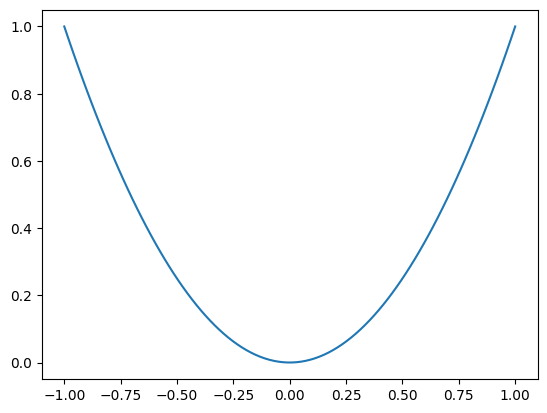

In [530]:
x = np.linspace(-1,1,100)
plt.plot(x,f(x))

**도함수 시각화**

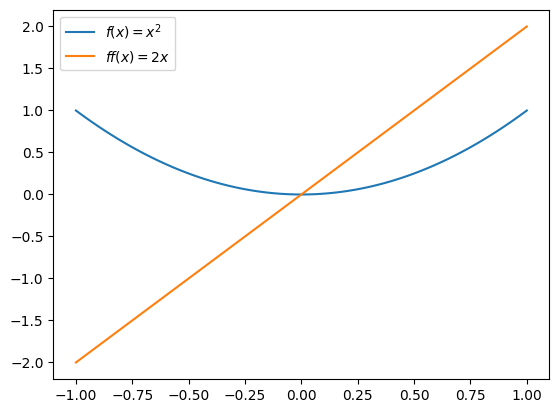

In [531]:
x = np.linspace(-1,1,100)
plt.plot(x,f(x),label=r'$f(x)=x^2$')
plt.plot(x,ff(x),label=r'$ff(x)=2x$')
plt.legend()

(예제3)의 다른표현

In [532]:
def f(x):
    return x**2

In [533]:
def derivate(f):
    h=0.000000000001
    return lambda x: (f(x+h)-f(x))/h

In [534]:
ff = derivate(f)

In [535]:
ff(10)

20.00888343900442

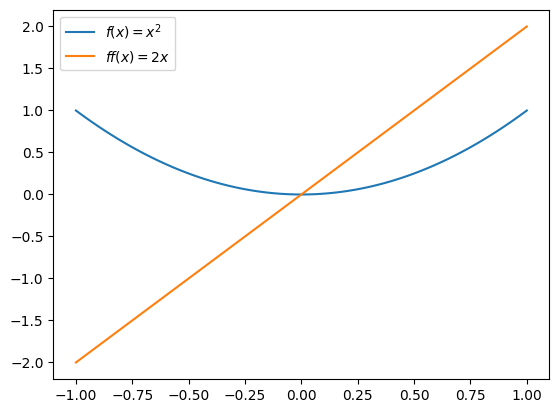

In [536]:
x = np.linspace(-1,1,100)
plt.plot(x,f(x),label=r'$f(x)=x^2$')
plt.plot(x,ff(x),label=r'$ff(x)=2x$')
plt.legend()

(예제4) 함수들의 리스트

In [537]:
flst = [lambda x: x, lambda x: x**2, lambda x: x**3]
flst

[<function __main__.<lambda>(x)>,
 <function __main__.<lambda>(x)>,
 <function __main__.<lambda>(x)>]

In [538]:
for f in flst:
    print(f(2))

2
4
8


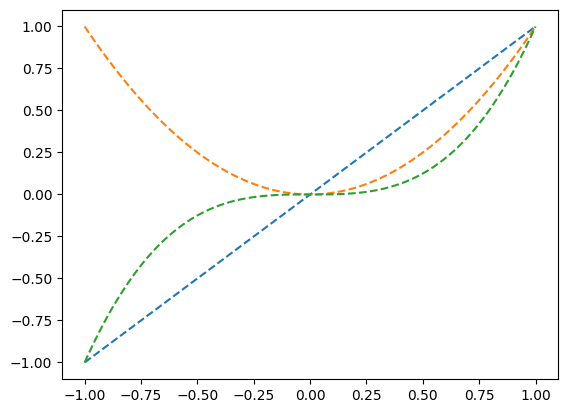

In [539]:
for f in flst:
    plt.plot(x,f(x),'--')

위의코드는 아래와 같음

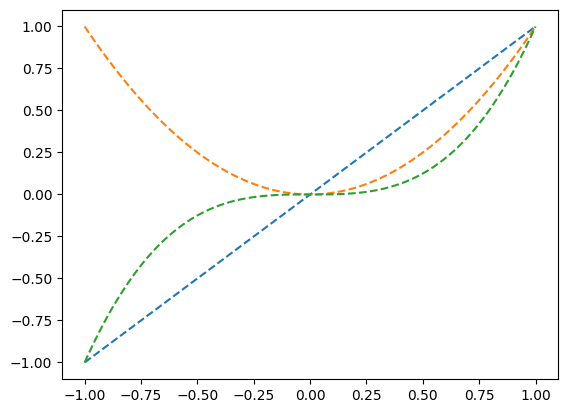

In [540]:
plt.plot(x,(lambda x: x)(x),'--')
plt.plot(x,(lambda x: x**2)(x),'--')
plt.plot(x,(lambda x: x**3)(x),'--')

## C. 정리

`-` 지금까지 개념

- 함수: 변수를 입력으로 받아서 변수를 출력하는 개념
- 변수: 어떠한 값을 저장하는 용도로 쓰거나 함수의 입력 혹은 출력으로 사용함

`-` R과 구별되는 파이썬의 독특한 테크닉 (부제: 파이썬에서 함수를 잘 쓰려면?)

- 변수든 함수이든 둘다 인스턴스임. (즉 어떠한 클래스에서 찍힌 똑같은 오브젝트라는 의미)
- 변수를 함수처럼: 메소드 `lst.append(1)`은 마치 `append(lst,1)`와 같은 함수로 쓸 수 있음
- 함수를 변수처럼($\star$): 함수자체를 함수의 입력으로 혹은 출력으로 쓸 수도 있음. 함수를 특정 값처럼 생각해서 함수들의 list를 만들 수도 있다.

## D. callable object

`-` 함수 오브젝트의 비밀?

In [541]:
f = lambda x: x+1

In [542]:
a=11

In [543]:
set(dir(f)) & {'__call__'}

{'__call__'}

- 함수 오브젝트에는 숨겨진 기능 `__call__`이 있다.

In [544]:
f.__call__(3) # f(3)

4

In [545]:
f.__call__(4) # f(4)

5

- 여기에 우리가 정의한 내용이 있다.

`-` 함수처럼 쓸 수 없는 인스턴스는 단지 call이 없는 것일 뿐이다.

In [546]:
class Klass:
    def __init__(self):
        self.name='guebin'

In [547]:
a=Klass()

In [548]:
a()

TypeError: 'Klass' object is not callable

- a는 callable이 아니라고 한다.

In [549]:
class Klass2:
    def __init__(self):
        self.name='guebin'    
    def __call__(self):
        print(self.name)

In [550]:
b=Klass2()

In [551]:
b()

guebin


- b는 callable object! 즉 숨겨진 메서드로 `__call__`를 가진 오브젝트!
- Klass는 callable object를 만들지 못하지만 Klass2는 callable object를 만든다.

> 파이썬의 비밀: `f()`와 같이 쓸 수 있는 오브젝트는 단지 `__call__` 이 정의되어있는 오브젝트일 뿐이다.

`-` callable 을 체크하는 방법 

In [554]:
set(dir(b)) & {'__call__'}

{'__call__'}

In [562]:
isinstance(b, collections.abc.Callable)

True

# 5. `__iter__` ($\star\star\star\star\star$)

## A. for문의 복습

`-` 아래와 같은 예제들을 관찰하여 for문을 복습하자.

(예제1) [1,2,3,4]

In [566]:
for i in [1,2,33,4]:
    print(i)

1
2
33
4


(예제2) (1,2,3,4)

In [567]:
for i in (1,2,33,4):
    print(i)

1
2
33
4


(예제3) '1234'

In [568]:
for i in '123asdf':
    print(i)

1
2
3
a
s
d
f


(예제4) 5

In [569]:
for i in 5:
    print(i)

TypeError: 'int' object is not iterable

`-` 의문1:

```python
for i in ???:
    print(i)
```

에서 ??? 자리에 올수 있는 것이 무엇일까?

(예제5) [[1,2,3,4],[3,4,5,6]], pd.DataFrame([[1,2,3,4],[3,4,5,6]])

In [570]:
lst = [[1,2,3,4],[3,4,5,6]]
lst

[[1, 2, 3, 4], [3, 4, 5, 6]]

In [571]:
for l in lst:
    print(l)

[1, 2, 3, 4]
[3, 4, 5, 6]


In [572]:
for l in np.array(lst):
    print(l)

[1 2 3 4]
[3 4 5 6]


In [573]:
for l in pd.DataFrame(lst):
    print(l)

0
1
2
3


`-` 데이터프레임인 경우는 colname이 반복

In [574]:
df = pd.DataFrame({'x':[1,2,3],'y':[2,3,4]})
df

,x,y
0,1,2
1,2,3
2,3,4


In [575]:
for d in df:
    print(d)

x
y


`-` 의문2: for의 출력결과는 어떻게 예측할 수 있을까?

## B. for문의 동작원리

`-` 의문1의 해결: 아래의 ??? 자리에 올 수 있는 것은 dir()하여 `__iter__`가 있는 object이다.

```python
for i in ???:
    print(i)
```

이러한 오브젝트를 iterable object라고 한다.

`-` 예제1~4 확인

In [576]:
lst = [1,2,3]
set(dir(lst)) & {'__iter__'}

{'__iter__'}

In [577]:
tpl = 1,2,3
set(dir(tpl)) & {'__iter__'}

{'__iter__'}

In [578]:
string = '123'
set(dir(string)) & {'__iter__'}

{'__iter__'}

In [579]:
a = 5
set(dir(a)) & {'__iter__'}

set()

`-` `__iter__`의 역할: iterable object를 iterator로 만들 수 있다!

In [580]:
lst = [1,22,-33]

In [581]:
lst_iterator = lst.__iter__()
# lst_iterator = iter(lst)

`-` iterator가 되면 무엇이 좋은가? -> 숨겨진 기능 `__next__`가 열린다.

In [582]:
set(dir(lst_iterator)) & {'__next__'}

{'__next__'}

`-` 그래서 `__next__`의 기능은? -> 원소를 차례대로 꺼내준다 + 더 이상 꺼낼 원소가 없으면 StopIteration Error를 발생시킨다.

In [583]:
next(lst_iterator)
# lst_iterator.__next__() # 같은코드

1

In [584]:
next(lst_iterator)
# lst_iterator.__next__() # 같은코드

22

In [585]:
next(lst_iterator)
# lst_iterator.__next__() # 같은코드

-33

In [586]:
next(lst_iterator)
# lst_iterator.__next__() # 같은코드

StopIteration: 

`-` for문의 동작원리

```python
for i in iterable:
    ...
```

1. 이터레이터생성: `.__iter__()` 혹은 `iter()`을 이용하여 iterable을 iterator로 만든다.

2. $i$생성 및 반복: 1에서 만들어진 iterator에서 `.__next__()`함수를 호출하고 결과를 $i$에 저장한뒤 for문 블락안의 내용 (들여쓰기 된 내용) 을 실행한다. $\to$ 반복한다.

3. 정지: `.__next__()`함수를 호출할때 StopIteration Error가 나오면 for문을 멈춘다.

```{mermaid}

flowchart LR
  A[iterable] --> |"__iter__()"| B(iterator)
  B --> |"__next__()"| C{stop?}
  C --> |NO| D[i] --> E[...] --> B
  C --> |YES| F[end]
```

`-` 아래의 구조도 잘 돌아갈까?

```python
for i in iterator:
    print(i)
```

> iterator의 iter가 자기자신을 리턴하도록 하는 트릭을 쓰면 "1.이터레이터생성 2.$i$생성 및 반복 3.정지"의 동작원리를 수정하지 않고 for문을 안전하게 돌릴 수 있다.

```{mermaid}

flowchart LR
  A(iterator) --> |"__iter__()"| B(iterator)
  B --> |"__next__()"| C{stop?}
  C --> |NO| D[i] --> E[...] --> B
  C --> |YES| F[end]
```

`-` 요약

- iterable object는 숨겨진 기능으로 `__iter__`를 가진다.
- iterator는 숨겨진 기능으로 `__iter__`와 `__next__`를 가진다. 따라서 정의상 iterator는 그 자체로 iterable object가 된다!
- iterator의 `__iter__`는 자기자신을 리턴한다.

`-` 의문2의 해결: for의 출력결과는 어떻게 예측할 수 있을까? iterator를 만들어서 `.__next__()`의 출력값을 확인하면 알 수 있다.

In [587]:
_df_itertor = iter(df)

In [588]:
next(_df_itertor)

'x'

In [589]:
next(_df_itertor)

'y'

In [590]:
next(_df_itertor)

StopIteration: 

## C. 사용자정의 이터레이터

`-` 내가 이터레이터를 만들어보자.

`-` 찌를 내는 순간 for문이 멈추도록 하는 이터레이터를 만들자.

In [591]:
class RPS_ITERATOR: # 찌를 내는순간 for문이 멈추도록 하는 이터레이터를 만들자
    def __init__(self):
        self.candidate = ["묵","찌","빠"]
    def __iter__(self):
        return self
    def __next__(self):
        action = np.random.choice(self.candidate)
        if action == "찌":
            print("찌가 나와서 for문을 멈춥니다")
            raise StopIteration
        else:
            return action

In [592]:
a = RPS_ITERATOR()

In [593]:
a.__next__()

찌가 나와서 for문을 멈춥니다


StopIteration: 

In [594]:
a.__next__()

'묵'

In [595]:
a.__next__()

'묵'

In [596]:
a.__next__()

'빠'

In [597]:
for i in a:
    print(i)

찌가 나와서 for문을 멈춥니다


## D. `range()`

`-` 파이썬에서 for문을 처음 배울 때: range(5)를 써라!

In [598]:
for i in range(5):
    print(i)

0
1
2
3
4


- range(5)가 도데체 무엇이길래?

`-` `range(5)`의 정체는 그냥 iterable object이다.

In [599]:
set(dir(range(5))) & {'__iter__','__next__'}

{'__iter__'}

`-` 그래서 언제든지 iterator로 바꿀 수 있다.

In [600]:
rtor= iter(range(5))
rtor

In [601]:
set(dir(rtor)) &  {'__iter__','__next__'}

{'__iter__', '__next__'}

`-` for문에서 range(5)가 행동하는 방법?

In [602]:
rtor = iter(range(5))

In [603]:
rtor.__next__()

0

In [604]:
rtor.__next__()

1

In [605]:
rtor.__next__()

2

In [606]:
rtor.__next__()

3

In [607]:
rtor.__next__()

4

In [608]:
rtor.__next__()

StopIteration: 

## E. `zip`

`-` 이터레이터의 개념을 알면 for문에 대한 이해도가 대폭 상승한다.

In [609]:
for i,j in zip([1,2,3],'abc'):
    print(i,j)

1 a
2 b
3 c


- zip은 뭐지?

In [610]:
zip([1,2,3],'abc')

`-` 어차피 `for i in ????`: 의 ???? 자리는 iterable object의 자리이다.

In [611]:
set(dir(zip([1,2,3],'abc'))) & {'__iter__','__next__'}

{'__iter__', '__next__'}

- `__next__()`함수가 있음 $\to$ `zip([1,2,3],'abc')`은 그자체로 iterator 였다!

In [612]:
z= zip([1,2,3],'abc')

In [613]:
z.__next__()

(1, 'a')

In [614]:
z.__next__()

(2, 'b')

In [615]:
z.__next__()

(3, 'c')

In [616]:
z.__next__()

StopIteration: 

***또다른 이해: 그러고보니까 `zip([1,2,3],'abc')`은 뭐하는 문법이지?***

In [617]:
zip?

Init signature: zip(self, /, *args, **kwargs)
Docstring:     
zip(*iterables, strict=False) --> Yield tuples until an input is exhausted.

   >>> list(zip('abcdefg', range(3), range(4)))
   [('a', 0, 0), ('b', 1, 1), ('c', 2, 2)]

The zip object yields n-length tuples, where n is the number of iterables
passed as positional arguments to zip().  The i-th element in every tuple
comes from the i-th iterable argument to zip().  This continues until the
shortest argument is exhausted.

If strict is true and one of the arguments is exhausted before the others,
raise a ValueError.
Type:           type
Subclasses:     

- 너 클래스였어?

In [618]:
iterator_from_zip = zip.__call__([1,2,3],'abc')

In [619]:
for i,j in iterator_from_zip:
    print(i,j)

1 a
2 b
3 c


> 파이썬의 작은 비밀: `zip`은 `iterator`를 찍어내는 클래스였음

## F. `enumerate`

`-` zip의 짝궁으로 enumerate가 있었음

In [620]:
for i,s in enumerate('abc'):
    print(i,s)

0 a
1 b
2 c


`-` `enumerate('abc')`도 문법상 iterable object 아니면 iterator 임.

In [621]:
set(dir(enumerate('abc'))) & {'__iter__', '__next__'}

{'__iter__', '__next__'}

- iterator 였군

In [622]:
iterator = enumerate('abc')

In [623]:
next(iterator)

(0, 'a')

In [624]:
next(iterator)

(1, 'b')

In [625]:
next(iterator)

(2, 'c')

In [626]:
next(iterator)

StopIteration: 

`-` 참고: enumerate 는 클래스임

In [627]:
enumerate?

Init signature: enumerate(iterable, start=0)
Docstring:     
Return an enumerate object.

  iterable
    an object supporting iteration

The enumerate object yields pairs containing a count (from start, which
defaults to zero) and a value yielded by the iterable argument.

enumerate is useful for obtaining an indexed list:
    (0, seq[0]), (1, seq[1]), (2, seq[2]), ...
Type:           type
Subclasses:     

> 파이썬의 작은 비밀: enumerate 역시 iterator를 찍어내는 클래스다.

> 파이썬의 비밀: iterator나 iterable object만 for문과 함께 사용할 수 있다. (단, 예외적으로 `__getitem__` 이 정의된 경우에는 for문과 함께 쓸 수 있음.)

## G. iterable / iterator object 체크

`-` 체크방법1

In [645]:
set(dir([1,2,3])) & {"__iter__"}

{'__iter__'}

In [650]:
set(dir([1,2,3])) & {"__next__"}

set()

In [651]:
set(dir(iter([1,2,3]))) & {"__iter__"}

{'__iter__'}

In [652]:
set(dir(iter([1,2,3]))) & {"__next__"}

{'__next__'}

`-` 체크방법2

In [672]:
l = [1,2,3]
isinstance(l,collections.abc.Iterable), isinstance(l,collections.abc.Iterator)

(True, False)

In [674]:
l = [1,2,3] 
isinstance(iter(l),collections.abc.Iterable), isinstance(iter(l),collections.abc.Iterator)

(True, True)

`-` 예외

In [675]:
class Dummy:
    def __getitem__(self):
        pass

In [676]:
isinstance(Dummy(),collections.abc.Iterable)

False

- 이터러블이 아니라고 판단됨

In [677]:
isinstance(iter(Dummy()),collections.abc.Iterable), isinstance(iter(Dummy()),collections.abc.Iterator)

(True, True)

- 그런데 이터레이터가 되었음..

# 6. 클래스와 인스턴스 

> [여기로 가보자](https://guebin.github.io/PP2024/posts/11wk-2.html#a.-%ED%81%B4%EB%9E%98%EC%8A%A4-%EC%84%A0%EC%96%B8)

참고1: 메소드의 첫입력은 `self`가 아니어도 상관없음. 

참고2: class안에서 정의된 변수를 쓸때 무조건 `self.변수이름`와 같은 형식으로 쓰는건 아님. `BobRoss.변수이름` 과 같이 self대신에 클래스의 이름을 쓰는 경우도 있음. 

이러한 내용들은 왜 있는것일까? A에서는 참고2에 대하여 알아 볼 것이고 B에서는 참고1에 대하여 알아 볼 것이다. 

## A. 인스턴스 변수, 클래스 변수

`# 예제1` -- 인스턴스변수 

In [343]:
class GS25: 
    def __init__(self):
        self.n_guests = 0 
    def come(self,m):
        self.n_guests = self.n_guests + m 
    def __repr__(self):
        return f"손님수(인스턴스) = {self.n_guests}"

In [344]:
store1 = GS25()

In [345]:
store1.come(2)
store1.come(3)
store1.come(5)

In [346]:
store1

손님수(인스턴스) = 10

In [347]:
store2 = GS25()

In [348]:
store2.come(1)
store2.come(1)
store2.come(1)

In [349]:
store2

손님수(인스턴스) = 3

`-` 질문1: GS25는 총 몇개의 store를 가지고 있는가? --> 2개

`-` 질문2: GS25는 모두 몇명의 손님이 왔는가? --> 10+3 = 13명

`# 예제2` -- 질문을 해결하기 위한 코드 

In [351]:
class GS25: 
    def __init__(self):
        self.n_guests = 0 
    def come(self,m):
        self.n_guests = self.n_guests + m 
    def __repr__(self):
        return f"손님수(인스턴스) = {self.n_guests}"

In [352]:
GS25.n_stores

AttributeError: type object 'GS25' has no attribute 'n_stores'

In [353]:
GS25.n_total_guests

AttributeError: type object 'GS25' has no attribute 'n_total_guests'

In [354]:
GS25.n_stores = 0
GS25.n_total_guests = 0 

In [356]:
GS25.n_stores, GS25.n_total_guests # 이게 가능하네??

(0, 0)

In [358]:
store1 = GS25()
GS25.n_stores = GS25.n_stores + 1

In [359]:
#store1.come(2)
store1.n_guests = store1.n_guests + 2 
GS25.n_total_guests = GS25.n_total_guests +2 
#store1.come(3)
store1.n_guests = store1.n_guests + 3 
GS25.n_total_guests = GS25.n_total_guests + 3 
#store1.come(5)
store1.n_guests = store1.n_guests + 5
GS25.n_total_guests = GS25.n_total_guests + 5 

In [360]:
store1

손님수(인스턴스) = 10

In [361]:
GS25.n_stores, GS25.n_total_guests

(1, 10)

In [362]:
store2 = GS25()
GS25.n_stores = GS25.n_stores + 1 

In [363]:
store2.come(1)
GS25.n_total_guests = GS25.n_total_guests + 1 
store2.come(1)
GS25.n_total_guests = GS25.n_total_guests + 1 
store2.come(1)
GS25.n_total_guests = GS25.n_total_guests + 1 

In [364]:
store2

손님수(인스턴스) = 3

In [365]:
GS25.n_stores, GS25.n_total_guests 

(2, 13)

`#`

`# 예제3` -- 질문을 해결하기 위한 코드 (2)

In [704]:
class GS25: 
    n_stores = 0
    n_total_guests = 0
    def __init__(self):
        self.n_guests = 0 
        GS25.n_stores = GS25.n_stores + 1 
    def come(self,m):
        self.n_guests = self.n_guests + m 
        GS25.n_total_guests = GS25.n_total_guests + m
    def __repr__(self):
        text = (
            f"GS25-{GS25.n_stores}호점\n"
            f"손님수(인스턴스) = {self.n_guests}\n"
            f"총손님수(클래스) = {GS25.n_total_guests}"    
        )
        return text 

In [705]:
store1 = GS25()
store1

GS25-1호점
손님수(인스턴스) = 0
총손님수(클래스) = 0

In [706]:
store1.come(2)
store1.come(3)
store1.come(5)
store1

GS25-1호점
손님수(인스턴스) = 10
총손님수(클래스) = 10

In [707]:
store2 = GS25()

In [708]:
store2.come(1)
store2.come(1)
store2.come(1)
store2

GS25-2호점
손님수(인스턴스) = 3
총손님수(클래스) = 13

**요약**

1. 클래스내에서 사용할 수 있는 변수는 "클래스변수", "인스턴스변수" 가 있으며, 클래스변수는 클래스 오브젝트에, 인스턴스 변수는 인스턴스 오브젝트에 귀속된다. 
2. 클래스변수는 class 이후에 변수명을 나열하여 선언하고, 인스턴스변수는 `__init__(self)` 에서 선언한다. 
3. 클래스변수를 사용할때는 `클래스이름.변수이름` 와 같은 형식으로, 인스턴스변수를 사용할때는 `self.변수이름`와 같은 형식으로 쓴다. 

`# 예제4` -- 인스턴스변수는 선언되지 않았으나, 같은이름의 클래스변수가 선언된 경우 클래스변수가 인스턴스변수를 대신한다. 

In [709]:
class Klass:
    a = 0 # a는 클래스 변수

In [710]:
Klass.a

0

In [711]:
ins = Klass()

In [712]:
ins.a # 인스턴스 변수가 없고, 클래스변수는 존재할 경우 클래스변수를 빌려쓴다. 

0

`#`

`# 예제5` -- 인스턴스가 클래스변수를 빌려쓰는 경우 클래스변수를 바꾸면 자동으로 인스턴스 변수도 바뀐다. 

In [713]:
class Klass:
    a = 0 # a는 클래스 변수

In [714]:
Klass.a

0

In [715]:
ins1 = Klass()

In [716]:
ins2 = Klass()

In [717]:
ins1.a, ins2.a 

(0, 0)

In [718]:
Klass.a = 10

In [719]:
ins1.a, ins2.a 

(10, 10)

`#`

`# 예제6` -- 인스턴스변수와 클래스변수가 동시에 선언된 경우, 각각 독립적으로 행동한다. 

In [720]:
class Klass:
    a = 0 # a는 클래스 변수
    def __init__(self):
        self.a = 1 # a는 인스턴스 변수

In [721]:
Klass.a

0

In [722]:
ins = Klass()

In [723]:
ins.a

1

In [724]:
Klass.a = 100
Klass.a, ins.a 

(100, 1)

In [725]:
ins.a = 200
Klass.a, ins.a 

(100, 200)

`# 예제7` -- 인스턴스가 클래스변수를 빌려쓰는 경우, 인스턴스 변수를 변경하더라도 클래스변수가 변경되지 않는다. (대신 예제6과 같이 인스턴스변수가 따로 독립적으로 생성되는 효과가 나온다) 

In [726]:
class Klass:
    a = 0 # a는 클래스 변수

In [727]:
Klass.a

0

In [728]:
ins1 = Klass()
ins2 = Klass()

In [729]:
ins1.a, ins2.a

(0, 0)

In [730]:
Klass.a = 100

In [731]:
Klass.a, ins1.a, ins2.a

(100, 100, 100)

In [732]:
ins1.a = 50

In [733]:
Klass.a, ins1.a, ins2.a # ins1만 50으로 바뀜

(100, 50, 100)

In [734]:
Klass.a = 200

In [735]:
Klass.a, ins1.a, ins2.a # ins1는 더이상 변수를 빌려쓰지 않음, 독자노선

(200, 50, 200)

`# 예제8` -- 정석적이지 않은사용 

In [736]:
class Up:
    a = 0 
    def up(self):
        self.a = self.a + 1 

In [737]:
ins = Up()

In [738]:
ins.a # 이때는 클래스변수를 빌려씀

0

In [739]:
ins.up() # 이걸 실행하는 순간 a는 인스턴스 변수로 변화

`#`

## B. 인스턴스 메서드

`-` self 비밀: 사실 클래스에서 정의된 함수의 첫번째 인자의 이름이 꼭 self일 필요는 없다. (무엇으로 전달하든 클래스안에서 정의된 메소드의 첫번째 인자는 기본적으로 instance의 태명역할을 한다) 

In [482]:
class Guebin: 
    def __init__(abab):
        abab.name = 'guebin'
    def __repr__(cdcd):
        return f"이름: {cdcd.name}"

In [483]:
a=Guebin()

In [484]:
a.name

'guebin'

In [485]:
a

이름: guebin

`-` 그런데 그냥 self를 쓰세요. 관습에 따르세요. 

## D. 클래스 메서드

`-` 클래스 메서드: 함수의 첫 인자로 클래스오브젝트를 받는 메서드를 클래스메서드라고 한다. 

`-` 목표: `클래스이름.f()`와 같은 형태로 사용할 수 있는 함수를 만들어 보자 -> 클래스메서드를 만들어보자!

`# 예제1` -- 아래의 코드를 수정해보자.

In [703]:
# class GS25: 
#     n_stores = 0
#     n_total_guests = 0
#     def __init__(self):
#         self.n_guests = 0 
#         GS25.n_stores = GS25.n_stores + 1 
#     def come(self,m):
#         self.n_guests = self.n_guests + m 
#         GS25.n_total_guests = GS25.n_total_guests + m
#     def __repr__(self):
#         text = (
#             f"GS25-{GS25.n_stores}호점\n"
#             f"손님수(인스턴스) = {self.n_guests}\n"
#             f"총손님수(클래스) = {GS25.n_total_guests}"    
#         )
#         return text 

In [702]:
class GS25:
    n_stores = 0
    n_total_guests = 0
    @classmethod
    def add_store(cls):
        cls.n_stores = cls.n_stores + 1 
    @classmethod        
    def add_guest(cls):
        cls.n_total_guests = cls.n_stores + 1 
    @classmethod 
    def info(cls):
        print(f"총점포수 = {cls.n_stores}\n총손님수 = {cls.n_total_guests}")
    #---#
    def __init__(self):
        self.n_guests = 0 
        GS25.add_store()
    def come(self,m):
        self.n_guests = self.n_guests + m 
        GS25.n_total_guests = GS25.n_total_guests + m
    def __repr__(self):
        text = (
            f"GS25-{GS25.n_stores}호점\n"
            f"손님수(인스턴스) = {self.n_guests}\n"
            f"총손님수(클래스) = {GS25.n_total_guests}"    
        )
        return text 

In [696]:
GS25.info()

총점포수 = 0
총손님수 = 0


In [697]:
store1 = GS25()

In [698]:
store1

GS25-1호점
손님수(인스턴스) = 0
손님수(클래스) = 0

In [700]:
store1.come(2)

In [701]:
store1

GS25-1호점
손님수(인스턴스) = 2
손님수(클래스) = 2

## F. 스태틱 메서드

`-` 스태틱 메서드: 첫 인자로 인스턴스와 클래스 모두 받지 않음. (클래스안에 정의되어 있지만 그냥 함수와 같음)

In [740]:
class Calculator: 
    @staticmethod
    def add(a,b):
        return a+b
    @staticmethod
    def sub(a,b):
        return a-b 

In [744]:
cal = Calculator()

In [745]:
cal.add(1,2)

3

In [746]:
cal.sub(1,2)

-1

- `cal`는 그냥 함수들을 묶어놓은 느낌? 정리하게 편하게? 

`-` 쓸모없다? 